<a href="https://colab.research.google.com/github/ambika1us/Hotel_Booking_Analysis/blob/main/Ambika_Prasad_Rath__Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
hotel_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/EDA_Project_1/Hotel Bookings.csv')

In [3]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
print(hotel_data.shape)
hotel_data.describe()

(119390, 32)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
plt.rcParams['figure.figsize'] = 8,8
labels = hotel_data['hotel'].value_counts().index.tolist()

In [6]:
sizes = hotel_data['hotel'].value_counts().tolist()


In [7]:
explode=(0,0.1)
colors=['Coral','Yellowgreen']


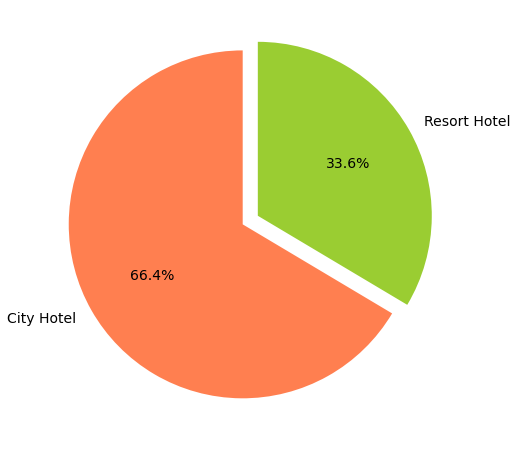

In [8]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()


In [9]:
hotel_data.isnull().sum()
print(round(100*hotel_data.isnull().sum()/len(hotel_data.index),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [10]:
hotel_data=hotel_data.drop(['agent','company'],axis=1)

In [11]:
hotel_data=hotel_data.dropna(axis=0)
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
hotel_data.columns=["Hotel","Cancelled","LeadTime","ArrivingYear","ArrivingMonth","ArrivingWeek","ArrivingDate","WeekendStay","WeekStay",
                    "Adult","Children","Babies","Meal","Country","Segment","DistChannel","RepeatGust","PrevCancel","PrevBook","BookRoomType","AssignRoomType",
                    "ChangeBooking","DepositType","WaitingDays","CustomerType","ADR","ParkingSpace","SpecialRequest","Reservation","ReservationDate"]

In [13]:
from pandas.core.strings.accessor import cat_core
def var(hotel_data):
  unique_list=pd.DataFrame([[i,len(hotel_data[i].unique())]for i in hotel_data.columns])
  unique_list.columns=['name','uniques']
  total_var=set(hotel_data.columns)
  cat_var=set(unique_list.name[(unique_list.uniques<=12)|
                               (unique_list.name=='Country')|
                               (unique_list.name=='Agent')
                               ])
  con_var=total_var-cat_var
  return cat_var,con_var
cat_var,con_var=var(hotel_data)
print("Continues Varialble(",len(con_var),")\n",con_var,'\n\n'"Categotical Variable(",len(cat_var),")\n",cat_var)


Continues Varialble( 12 )
 {'ADR', 'PrevBook', 'Adult', 'WeekendStay', 'PrevCancel', 'ArrivingDate', 'ReservationDate', 'LeadTime', 'WaitingDays', 'WeekStay', 'ArrivingWeek', 'ChangeBooking'} 

Categotical Variable( 18 )
 {'Reservation', 'DepositType', 'CustomerType', 'Cancelled', 'ParkingSpace', 'AssignRoomType', 'Segment', 'RepeatGust', 'BookRoomType', 'Children', 'DistChannel', 'Country', 'Hotel', 'Babies', 'ArrivingYear', 'ArrivingMonth', 'SpecialRequest', 'Meal'}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

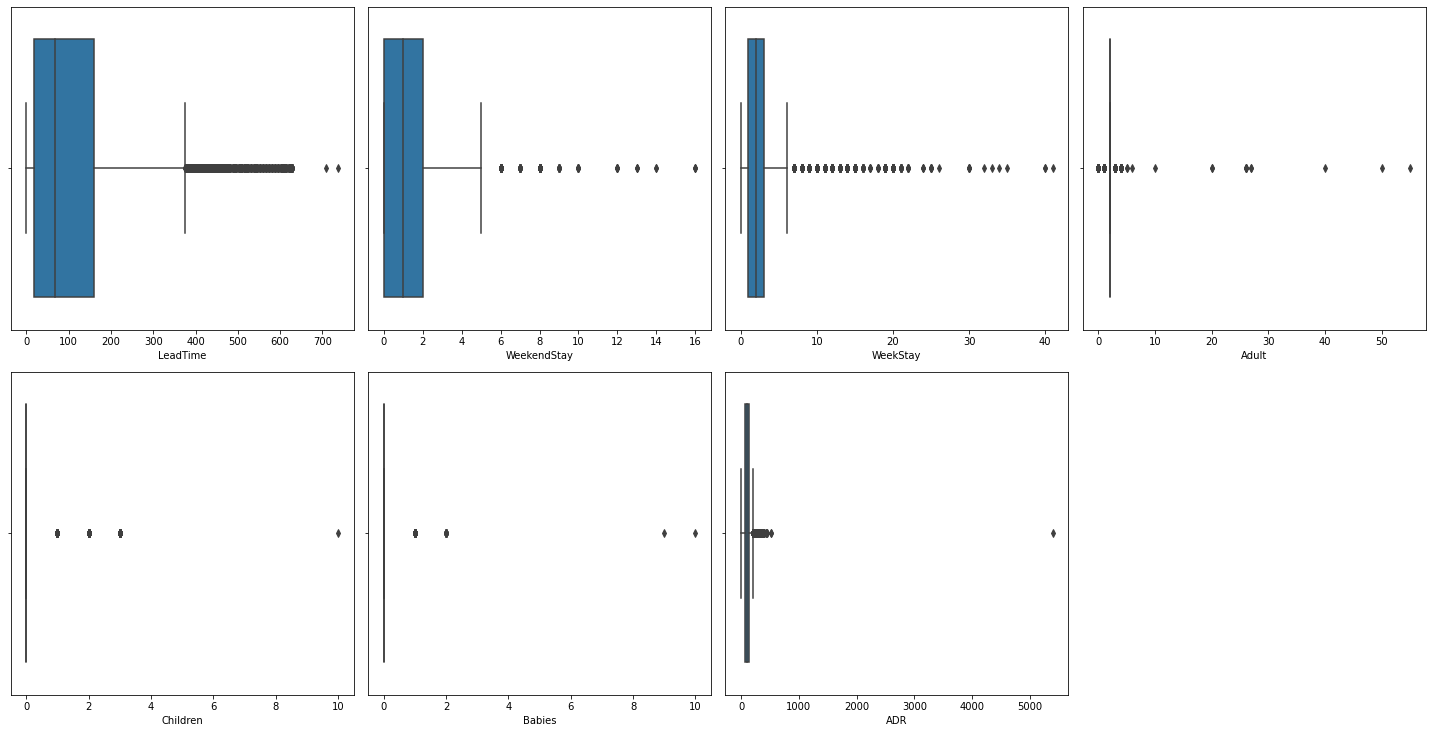

In [14]:
fea=['LeadTime','WeekendStay','WeekStay','Adult','Children','Babies','ADR']
n=1
plt.figure(figsize=(20,20))
for fea in fea:
  plt.subplot(4,4,n)
  sns.boxplot(hotel_data[fea])
  n+=1
  plt.tight_layout()

In [15]:
hotel_data[con_var].describe()

,ADR,PrevBook,Adult,WeekendStay,PrevCancel,ArrivingDate,LeadTime,WaitingDays,WeekStay,ArrivingWeek,ChangeBooking
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,102.003243,0.131634,1.858391,0.928897,0.087142,15.800880,104.311435,2.330754,2.502145,27.166555,0.221181
std,50.485862,1.484672,0.578576,0.996216,0.845869,8.780324,106.903309,17.630452,1.900168,13.589971,0.652785
min,-6.380000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,70.000000,0.000000,2.000000,0.000000,0.000000,8.000000,18.000000,0.000000,1.000000,16.000000,0.000000
50%,95.000000,0.000000,2.000000,1.000000,0.000000,16.000000,69.000000,0.000000,2.000000,28.000000,0.000000
75%,126.000000,0.000000,2.000000,2.000000,0.000000,23.000000,161.000000,0.000000,3.000000,38.000000,0.000000
max,5400.000000,72.000000,55.000000,16.000000,26.000000,31.000000,737.000000,391.000000,41.000000,53.000000,21.000000


In [16]:
hotel_data.loc[hotel_data.LeadTime>500,'LeadTime']=500
hotel_data.loc[hotel_data.WaitingDays>0,'WaitingDays']=1
hotel_data.loc[hotel_data.WeekendStay>=5,'WeekendStay']=5
hotel_data.loc[hotel_data.Adult>4,'Adult']=4
hotel_data.loc[hotel_data.PrevBook>0,'PrevBook']=1
hotel_data.loc[hotel_data.PrevCancel>0,'PrevCancel']=1
hotel_data.loc[hotel_data.WeekStay>10,'WeekStay']=10
hotel_data.loc[hotel_data.ChangeBooking>5,'ChangeBooking']=5
cat_var=set(list(cat_var)+['PrevBook','PrevCancel'])
con_var=set(hotel_data.columns)-cat_var
hotel_data[con_var].describe()

,ADR,Adult,WeekendStay,ArrivingDate,LeadTime,WaitingDays,WeekStay,ArrivingWeek,ChangeBooking
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,102.003243,1.855607,0.924187,15.800880,104.054543,0.031102,2.481581,27.166555,0.217237
std,50.485862,0.488194,0.967762,8.780324,105.834923,0.173595,1.760766,13.589971,0.602693
min,-6.380000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,70.000000,2.000000,0.000000,8.000000,18.000000,0.000000,1.000000,16.000000,0.000000
50%,95.000000,2.000000,1.000000,16.000000,69.000000,0.000000,2.000000,28.000000,0.000000
75%,126.000000,2.000000,2.000000,23.000000,161.000000,0.000000,3.000000,38.000000,0.000000
max,5400.000000,4.000000,5.000000,31.000000,500.000000,1.000000,10.000000,53.000000,5.000000


In [17]:
hotel_data.loc[hotel_data.Babies>8,'Babies']=0
hotel_data.loc[hotel_data.ParkingSpace>5,'ParkingSpace']=0
hotel_data.loc[hotel_data.Children>8,'Children']=0
hotel_data[cat_var].describe()

,ParkingSpace,PrevCancel,RepeatGust,Children,Babies,SpecialRequest,Cancelled,ArrivingYear,PrevBook
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.061750,0.054223,0.032011,0.104123,0.007788,0.571683,0.371352,2016.157656,0.028571
std,0.241992,0.226458,0.176029,0.398139,0.089236,0.792678,0.483168,0.707459,0.166597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2017.000000,0.000000
max,3.000000,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,2017.000000,1.000000


In [18]:
hotel_data['Kids']=hotel_data.Children+hotel_data.Babies
hotel_data['total_members']=hotel_data.Kids+hotel_data.Adult

In [19]:
hotel_data['ArrivingYear']=hotel_data['ArrivingYear'].astype('str')
hotel_data['ArrivingMonth']=hotel_data['ArrivingMonth'].astype('str')
hotel_data['ArrivingDate']=hotel_data['ArrivingDate'].astype('str')
hotel_data['Cancelled']=hotel_data['Cancelled'].astype('str')
hotel_data['RepeatGust']=hotel_data['RepeatGust'].astype('str')

In [20]:
hotel_data['Arrival Date']=hotel_data['ArrivingDate']+'-'+hotel_data['ArrivingMonth']+'-'+hotel_data['ArrivingYear']
hotel_data['Arrival Date']=pd.to_datetime(hotel_data['Arrival Date'],errors='coerce')
confirmed_booking=hotel_data[hotel_data.Cancelled=='0']
import datetime as dt
confirmed_booking['ArrivingMonth']=hotel_data['Arrival Date'].dt.month
final_count=confirmed_booking['ArrivingMonth'].value_counts().sort_index()
print(final_count)

1     4068
2     5317
3     6591
4     6533
5     7102
6     6393
7     7892
8     8618
9     6367
10    6867
11    4632
12    4365
Name: ArrivingMonth, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
print('Total Booking Cancelled')
print(hotel_data.Cancelled.value_counts())
print('Cancellation percent in both hotels')
print(hotel_data.Cancelled.value_counts(normalize=True))

Total Booking Cancelled
0    74745
1    44153
Name: Cancelled, dtype: int64
Cancellation percent in both hotels
0    0.628648
1    0.371352
Name: Cancelled, dtype: float64


In [22]:
print(hotel_data.Country.value_counts(normalize=True)*100)

PRT    40.863597
GBR    10.201181
FRA     8.759609
ESP     7.206177
DEU     6.128783
         ...    
DJI     0.000841
BWA     0.000841
HND     0.000841
VGB     0.000841
NAM     0.000841
Name: Country, Length: 177, dtype: float64


In [23]:
hotel_data.ArrivingMonth.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: ArrivingMonth, dtype: float64

In [24]:
hotel_data.Segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: Segment, dtype: float64

In [25]:
hotel_data.ArrivingYear.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: ArrivingYear, dtype: float64

In [26]:
hotel_data.Meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: Meal, dtype: float64

In [27]:
hotel_data.CustomerType.value_counts(normalize=True)

Transient          0.750004
Transient-Party    0.210920
Contract           0.034281
Group              0.004794
Name: CustomerType, dtype: float64

In [28]:
hotel_data.Reservation.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: Reservation, dtype: float64

In [29]:
hotel_data.BookRoomType.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: BookRoomType, dtype: float64

In [30]:
hotel_data.ADR.value_counts(normalize=True)

62.00     0.031565
75.00     0.022793
90.00     0.020783
65.00     0.020160
0.00      0.016300
            ...   
96.09     0.000008
48.03     0.000008
89.43     0.000008
63.07     0.000008
157.71    0.000008
Name: ADR, Length: 8870, dtype: float64

In [31]:
hotel_data.LeadTime.value_counts(normalize=True)

0      0.052339
1      0.028537
2      0.017099
3      0.015156
4      0.014264
         ...   
458    0.000008
371    0.000008
424    0.000008
380    0.000008
463    0.000008
Name: LeadTime, Length: 451, dtype: float64

In [32]:
hotel_data.Cancelled.value_counts(normalize=True)

0    0.628648
1    0.371352
Name: Cancelled, dtype: float64

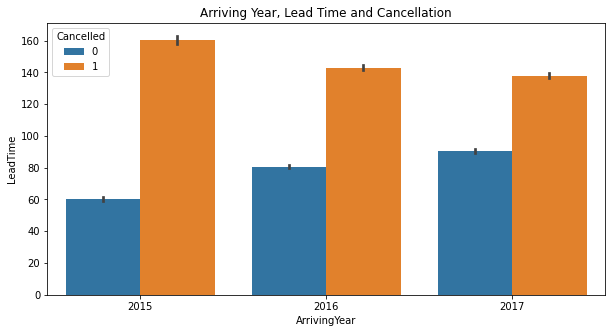

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x='ArrivingYear',y='LeadTime',hue='Cancelled',data=hotel_data)
plt.title('Arriving Year, Lead Time and Cancellation')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


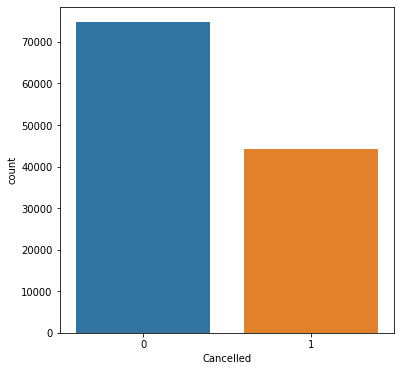

In [34]:
plt.figure(figsize=(6,6))
#Cancelled=1,Not Cancelled=0
sns.countplot(hotel_data['Cancelled'])
plt.show()

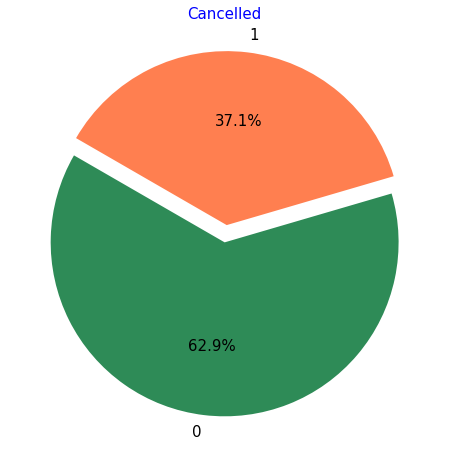

In [35]:
sizes1=hotel_data['Cancelled'].value_counts().tolist()
labels1=hotel_data['Cancelled'].value_counts().index.tolist()
cols=['seagreen','coral']
plt.pie(sizes1,explode=explode,labels=labels1,colors=cols,autopct='%1.1f%%',startangle=150,textprops={'fontsize':15})
plt.title('Cancelled',fontsize=15,color='blue')
plt.show()

#hotel_data['Cancelled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,colors=cols,textprops={'fontsize':14},startangle=180)

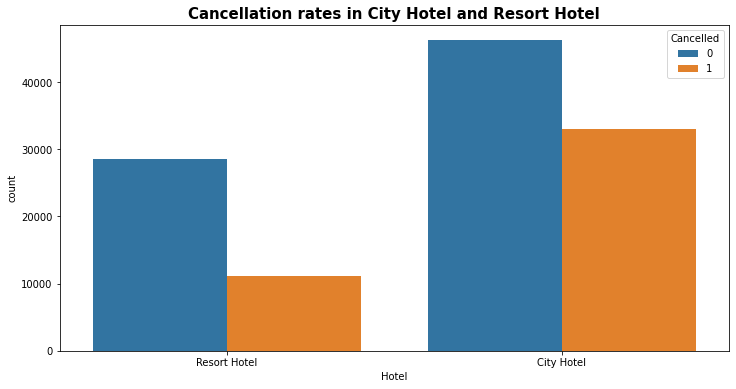

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hotel',hue='Cancelled',data=hotel_data)
plt.title("Cancellation rates in City Hotel and Resort Hotel",fontweight="bold",size=15)
plt.show()

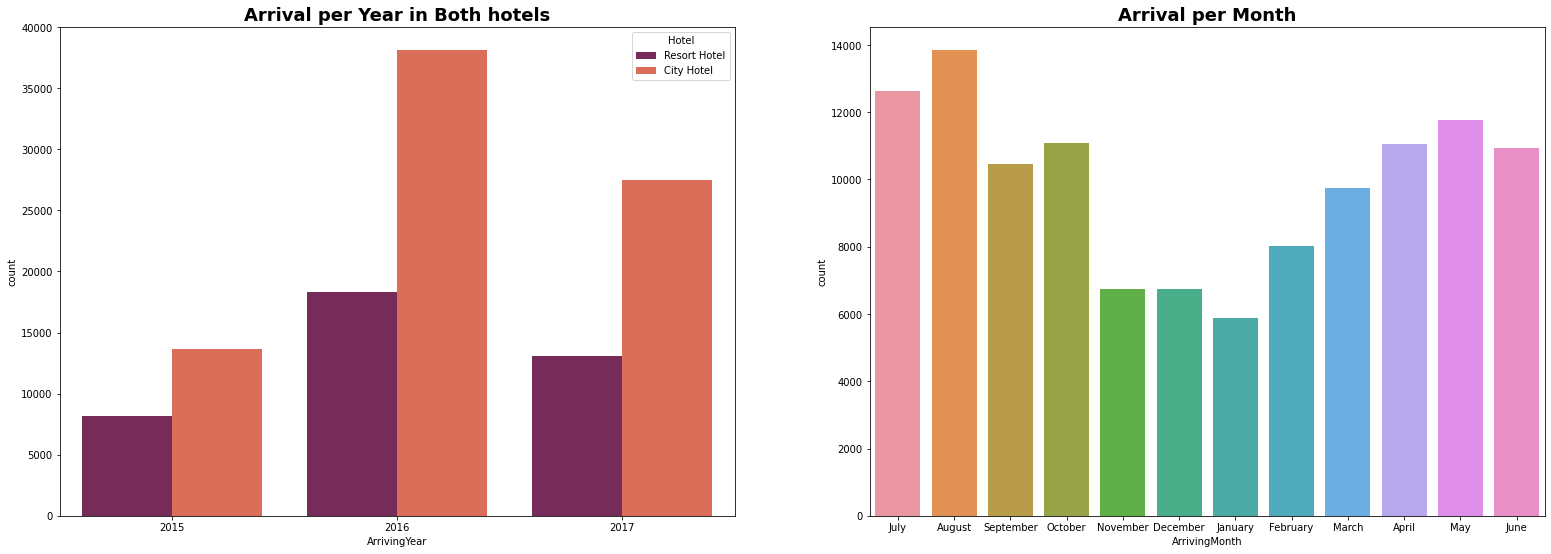

In [37]:
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
sns.countplot(x='ArrivingYear',hue='Hotel',data=hotel_data,palette='rocket')
plt.title("Arrival per Year in Both hotels",fontweight="bold",size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='ArrivingMonth')
plt.title("Arrival per Month",fontweight="bold", size=18)
plt.subplots_adjust(right=1.5)
plt.show()

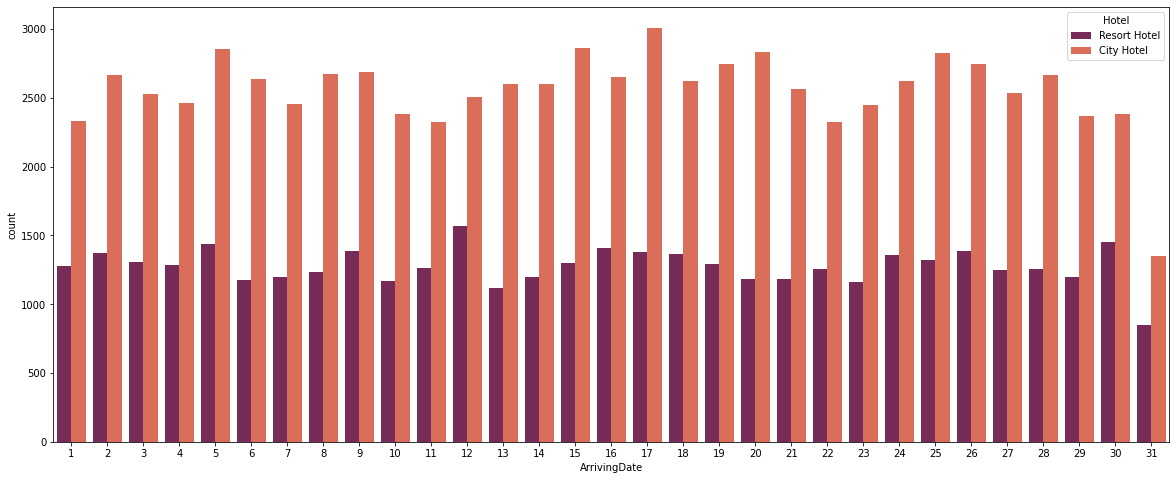

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(data=hotel_data,x='ArrivingDate',hue='Hotel',palette='rocket')
plt.show()

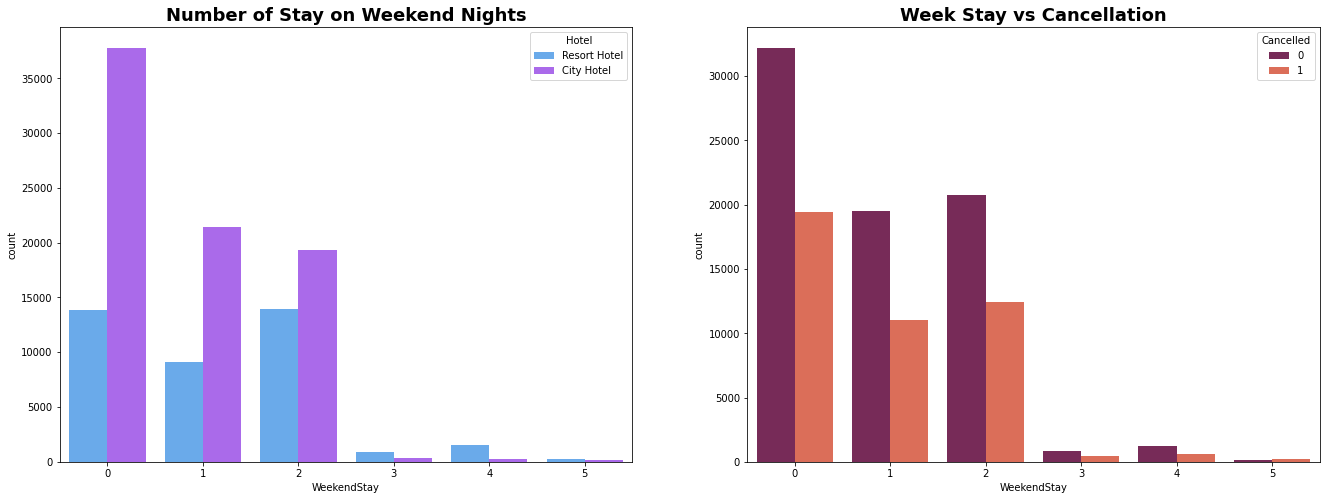

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='WeekendStay',hue='Hotel',data=hotel_data,palette='cool')
plt.title('Number of Stay on Weekend Nights',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='WeekendStay',hue='Cancelled',palette='rocket')
plt.title('Week Stay vs Cancellation',fontweight='bold',size=18)
plt.subplots_adjust(right=1)
plt.show()

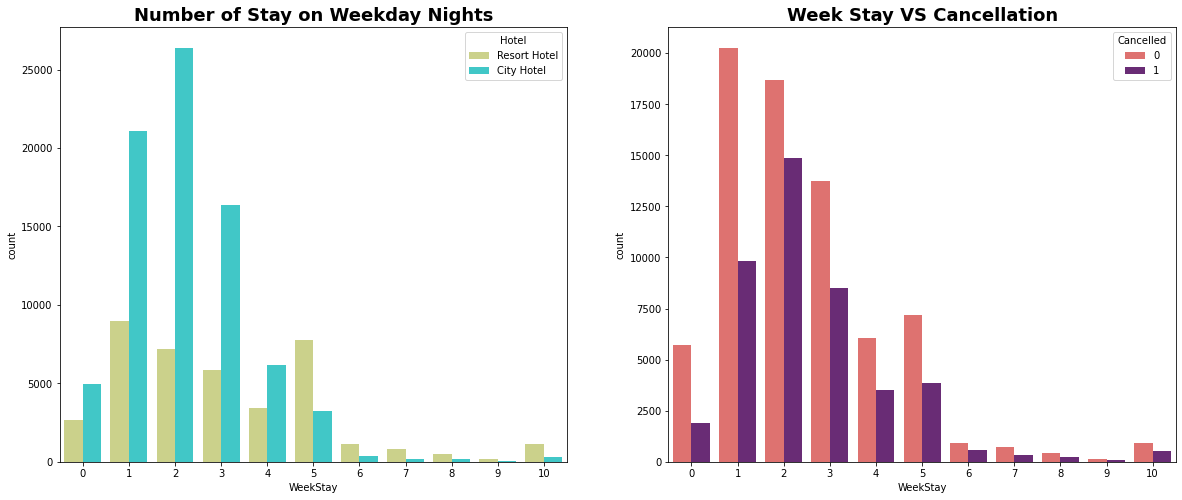

In [40]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='WeekStay',hue='Hotel',data=hotel_data,palette='rainbow_r')
plt.title('Number of Stay on Weekday Nights',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='WeekStay',hue='Cancelled',palette='magma_r')
plt.title('Week Stay VS Cancellation',fontweight='bold',size=18)

plt.show()

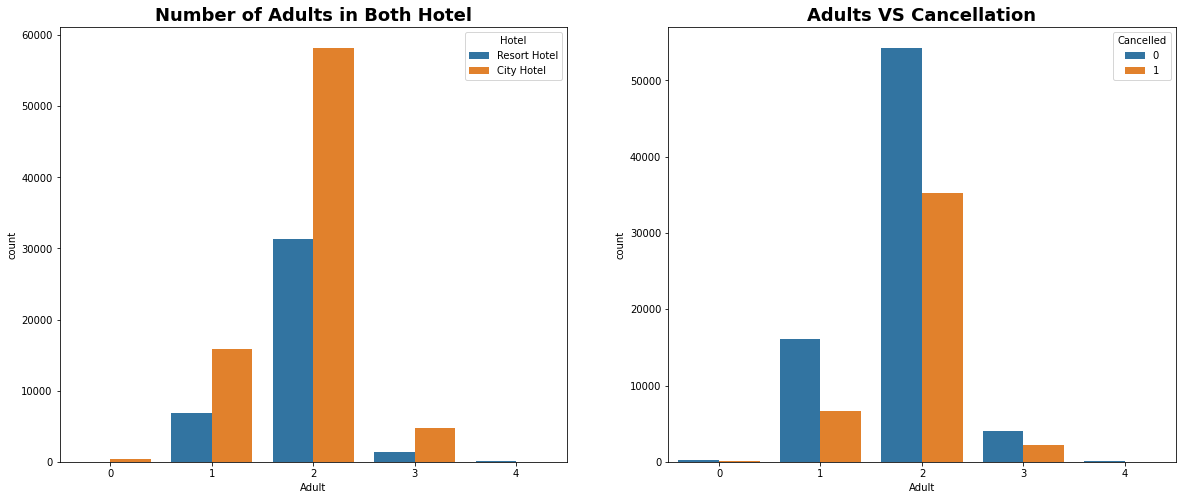

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Adult',hue='Hotel',data=hotel_data)
plt.title("Number of Adults in Both Hotel",fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='Adult',hue='Cancelled')
plt.title('Adults VS Cancellation',fontweight='bold',size=18)
plt.show()

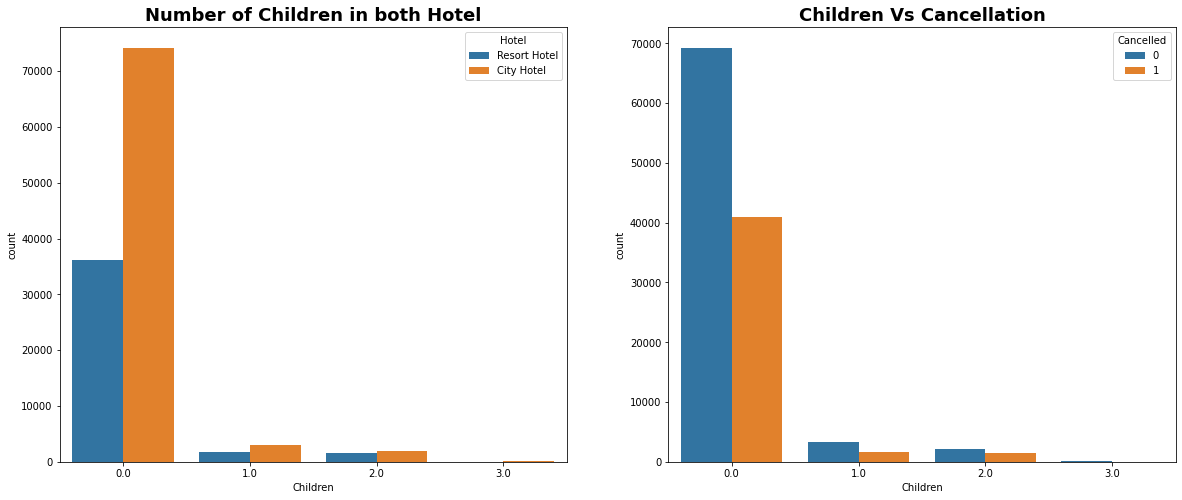

In [42]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Children',hue='Hotel',data=hotel_data)
plt.title('Number of Children in both Hotel',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='Children',hue='Cancelled')
plt.title('Children Vs Cancellation',fontweight='bold',size=18)
plt.show()

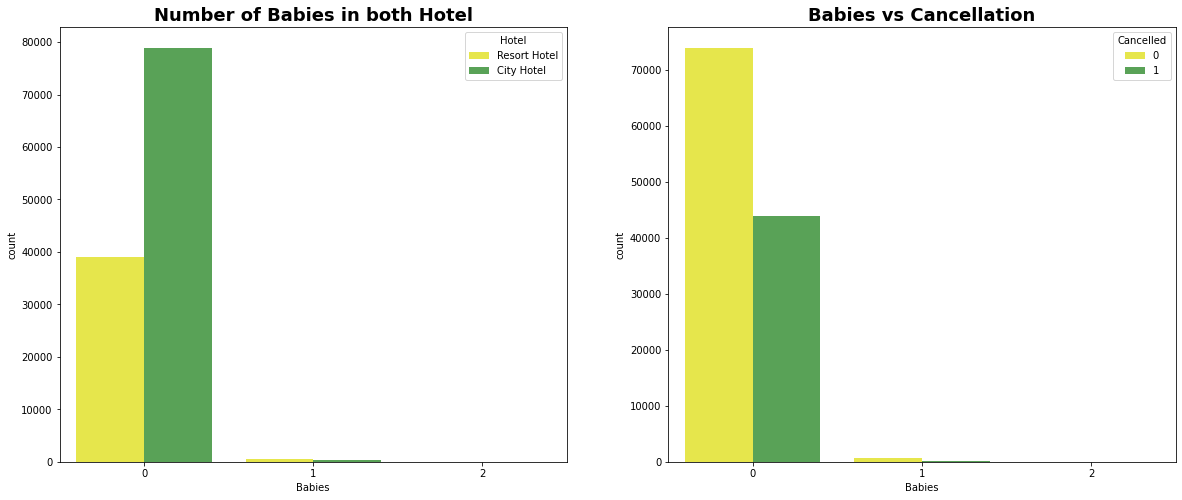

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Babies',hue='Hotel',data=hotel_data,palette='Set1_r')
plt.title('Number of Babies in both Hotel',fontweight='bold',size=18)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='Babies',hue='Cancelled',palette='Set1_r')
plt.title('Babies vs Cancellation',fontweight='bold',size=18)
plt.show()

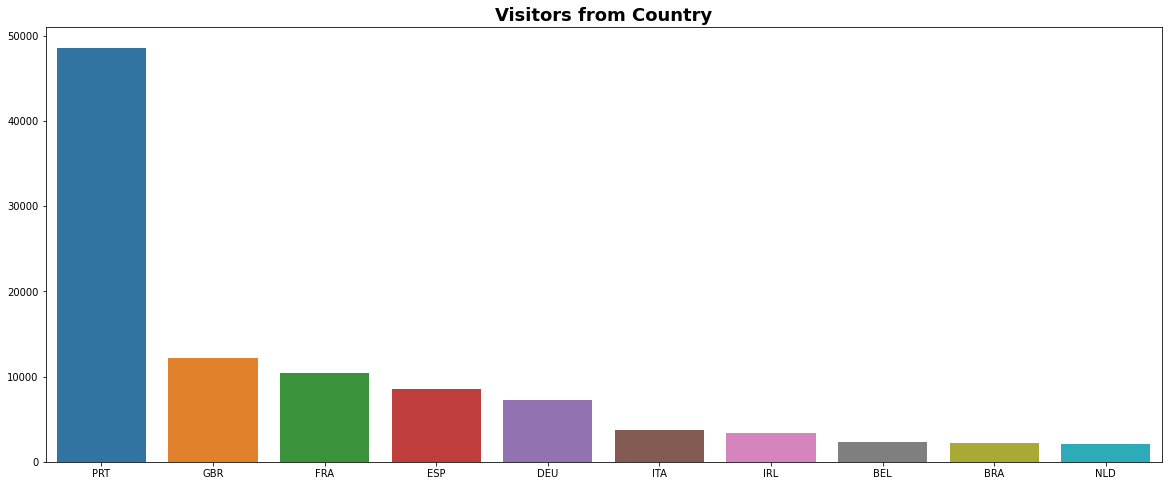

In [44]:
plt.figure(figsize=(20,8))
plt.title('Visitors from Country',fontweight='bold',size=18)
sns.barplot (y= list(hotel_data.Country.value_counts().head (10)), x= list(hotel_data.Country.value_counts().head(10).index))
plt.show()

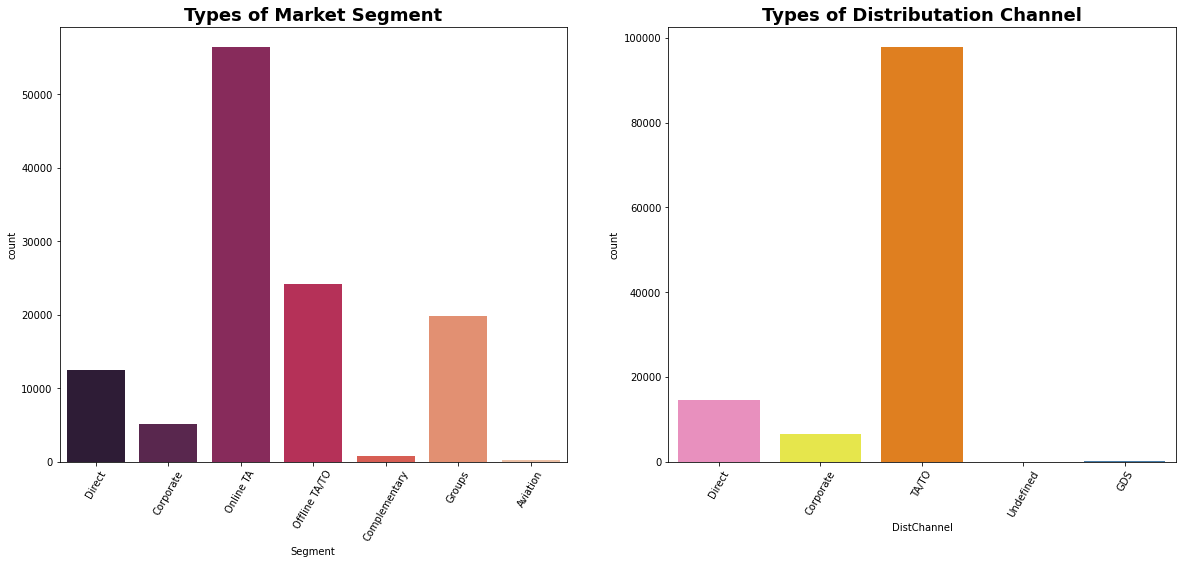

In [45]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='Segment',data=hotel_data,palette='rocket')
plt.title('Types of Market Segment',fontweight='bold',size=18)
plt.xticks(rotation=60)
plt.subplot(1,2,2)
sns.countplot(data=hotel_data,x='DistChannel',palette='Set1_r')
plt.title('Types of Distributation Channel',fontweight='bold',size=18)
plt.xticks(rotation=60)
plt.show()

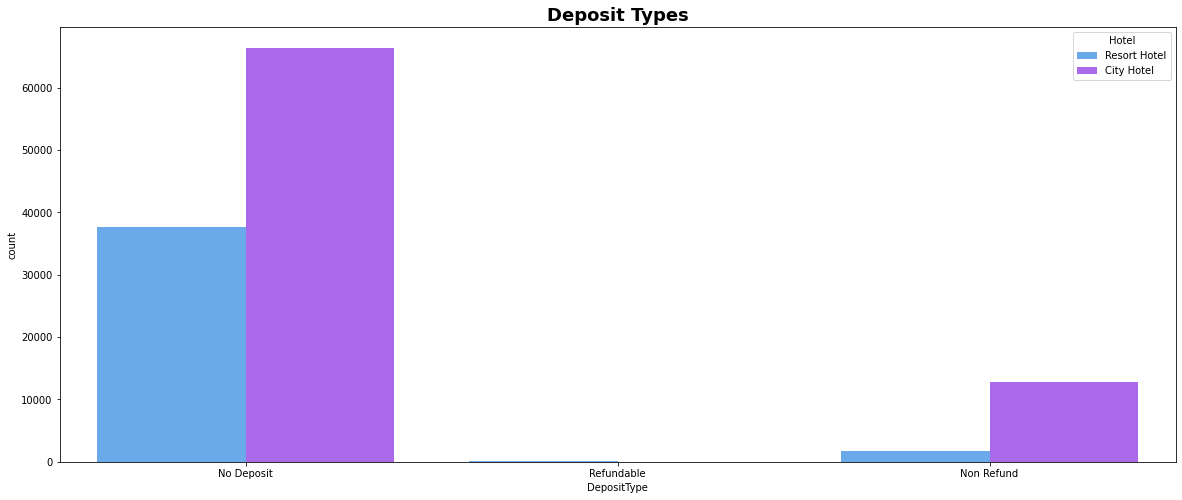

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(data=hotel_data,x='DepositType',hue='Hotel',palette='cool')
plt.title('Deposit Types',fontweight='bold',size=18)
plt.show()

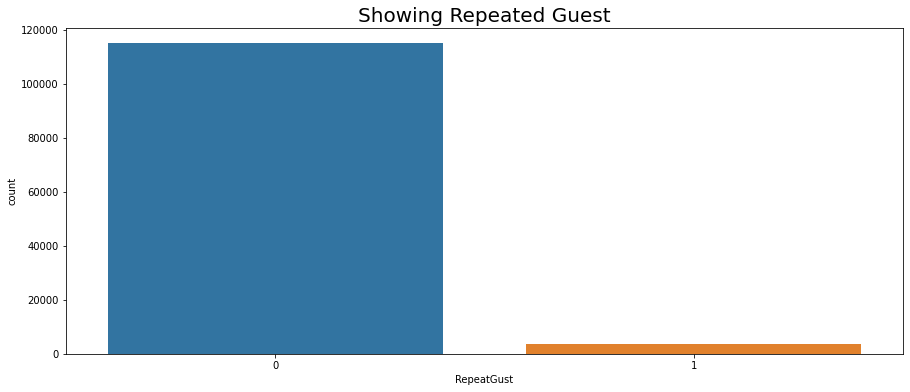

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(data=hotel_data,x='RepeatGust').set_title('Showing Repeated Guest',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


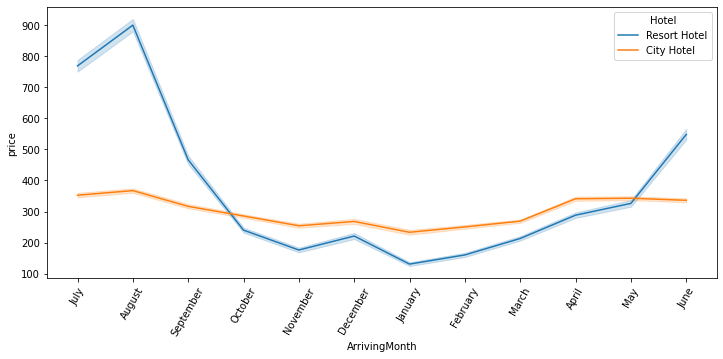

In [48]:
plt.figure(figsize=(12,5))
hotel_data['adr_pp']=hotel_data['ADR']/(hotel_data['Adult']+hotel_data['Children'])
actual_guest=hotel_data.loc[hotel_data['Cancelled']=='0']
actual_guest['price']=actual_guest['ADR']*(actual_guest['WeekendStay']+actual_guest['WeekStay'])
sns.lineplot(data=actual_guest,x='ArrivingMonth',y='price',hue='Hotel')
plt.xticks(rotation=60)
plt.show()